<a href="https://colab.research.google.com/github/Wiicht/AB_Testing/blob/main/Analyze_ab_test_results_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze A/B Test Results 
## Project from Udacity

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

<a id='intro'></a>
## Introduction

- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

Let's import the libraries.

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
df = files.upload()

Saving ab_data.csv to ab_data.csv


In [ ]:
from google.colab import files
df = files.upload()

Saving countries.csv to countries.csv


### Let's inspect the dataframe

In [ ]:
df = pd.read_csv('ab_data.csv')
df.tail(2)

,user_id,timestamp,group,landing_page,converted
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [ ]:
nr_rows = df.shape[0]
print('The # of rows are:', nr_rows)

The # of rows are: 294478


**c.** The number of unique users in the dataset.

In [ ]:
unique_users = df['user_id'].nunique()
print('The # of unique users is:', unique_users)

The # of unique users is: 290584


**d.** The proportion of users converted.

In [ ]:
converter_col = df['converted'].value_counts()
proportion_converted = converter_col[1] / df.shape[0]
print('The procentage of converted users is: {%.2f}' %(proportion_converted*100), "%")

The procentage of converted users is: {11.97} %


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [ ]:
trestment_and_new_page = df.query('group == "treatment" and landing_page != "new_page"')
control_and_old_page = df.query('group == "control" and landing_page != "old_page"')

print('They dont that many times:', len(control_and_old_page) + len(trestment_and_new_page))

They dont that many times: 3893


**f.** Do any of the rows have missing values?

In [ ]:
if df.isnull().values.any() == False:
    print('There are no missing values.')
else:
    print('There are missing values.')
    print('# of missing values is:', df.isna().sum().sum())

There are no missing values.


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [ ]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df[(df.group == 'control') & (df.landing_page == 'new_page')].index)
df2 = df2.drop(df[(df.group == 'treatment') & (df.landing_page == 'old_page')].index)
# We dont want in the peope in the control group to see the new page. And neither 
# do we want the treatment group to see the old page

In [ ]:
# Double Check wheater all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
"""if df2[((df2['group'] == 'treatment') & (df2['landing_page'] == 'new_page')) == False].shape[0] == 0:
    print('all good')
else:
    print('There are still wrong rows')"""
if len(df2.query('group == "control" & landing_page != "old_page"')) == 0 & len(df2.query('group == "treatment" & landing_page != "new_page"')) == 0:
    print("All rows are fine.")
else:
    print("There are still wrong rows.")

All rows are fine.


**a.** How many unique **user_id**s are in **df2**?

In [ ]:
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [ ]:
unique_users = df2['user_id'].nunique()
print('There are %2d unique users.' % (unique_users))
#print(len(np.unique(df['user_id'].values)))

There are 290584 unique users.


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [ ]:
double = df2[df2.duplicated(['user_id'])]
double

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [ ]:
df2.shape

(290585, 5)

**c.** Display the rows for the duplicate **user_id**

In [ ]:
# We could also just use the user_id we get. But that way it would work with other dataframes.
try: 
    f = df2[df2['user_id'] == double['user_id'].values[0]]
except: 
    print("All gone")
f

# same: df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [ ]:
d = f['user_id']

**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [ ]:
# Remove one of the rows with a duplicate user_id..
# I am deleteing the row accessing it by its index
#df2.loc[df['user_id'].isin([773192])]
# When that index is deleted and the cell is run again, we get an error. -> try
try: 
    df2 = df2.drop(d.index[1]) # index 1 is after 1 run out of range and produces an error. So it is not executed egain and we are good
#   df2 = df2.drop(1899)
except:
    print('Already deleted')

In [ ]:
df2.shape[0]

290584

## 1.4

**a.** What is the probability of an individual converting regardless of the page they receive?


In [ ]:
converted_ones = df2[df2['converted'] == 1]
p_population = len(converted_ones) / len(df2)
print('The probability someone changes is %f' %(p_population))
# Or: df2['converted'].mean()

The probability someone changes is 0.119597


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [ ]:
converted_control = df2.query('group == "control" & converted == 1')
all_control = df2.query('group == "control"')
proba_control = len(converted_control) / len(all_control)
print('The probability someone changes from the control group \nis %f' %(proba_control))

The probability someone changes from the control group 
is 0.120386


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [ ]:
converted_treatment = df2.query('group == "treatment" & converted == 1')
all_treatment = df2.query('group == "treatment"')
proba_treatment = len(converted_treatment) / len(all_treatment)
print('The probability someone changes from the treatment group is %f' %(proba_treatment))

The probability someone changes from the treatment group is 0.118808


In [159]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = proba_treatment - proba_control
print('The obs_diff is:', obs_diff)

The obs_diff is: -0.0015782389853555567


**d.** What is the probability that an individual received the new page?

In [160]:
useres_new_page = df2.query('landing_page == "new_page"')
prob_new_page = len(useres_new_page) / len(df2)
print('The probability someone gets the new page is %f' %(prob_new_page))

The probability someone gets the new page is 0.500062


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Answer:** <br>
The old and the new page perform almost the same. But it is only a very small difference. It even seems like the old page (control group) converts more than new page. This might be due to the following reasons:
a) The new page looks and/or works worse. <br>
b) Change Aversion: Existing users may give an unfair advantage to the old version simply because they are unhappy with the change, even if it’s ultimately for the better.

<a id='ab_test'></a>
## Part II - A/B Test

For now, consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Answer:** <br>
H<sub>0</sub>: The propability a users from the control group switches to the new page is equal or higher than the propability a user from the treatment group changes. (old page is equal or better)<br>
H<sub>1</sub>: The propability a user from the treatment group changes to the new page is higher that the one from the control group. (new page is better)<br><br>
<Center>
$$
H_o: p_{old} >= p_{new} \\
H_1: p_{old} < p_{new}
$$
</center>

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [161]:
p_new = len(converted_ones) / len(df2)
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [162]:
p_old = len(converted_ones) / len(df2)
p_old

0.11959708724499628

In [163]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [164]:
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [165]:
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [166]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], n_new, p=[p_new,1-p_new])
new_page_converted.mean()

0.8813158075837864

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [167]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], n_old, p=[p_old,1-p_old])
old_page_converted.mean()

0.8797375992951251

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [168]:
difference = new_page_converted.mean() - old_page_converted.mean()
difference

0.001578208288661287


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [169]:
# Sampling distribution
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
np.mean(p_diffs)
new_converted_simulation

array([0.11903517, 0.11891817, 0.1182644 , ..., 0.11814053, 0.11942743,
       0.11954442])

In [170]:
p_diffs = np.array(p_diffs)

In [171]:
np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

(-0.0023420927822041405, 0.002351818371313431)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

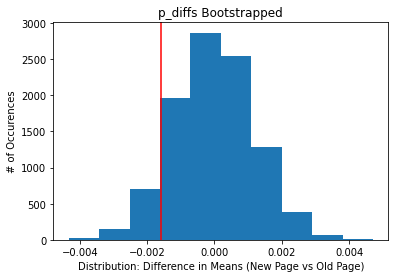

In [172]:
plt.hist(p_diffs);
plt.axvline(obs_diff, color='red');
plt.title("p_diffs Bootstrapped");
plt.xlabel("Distribution: Difference in Means (New Page vs Old Page)");
plt.ylabel('# of Occurences');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [174]:
(p_diffs > obs_diff).mean()

0.9078

In [175]:
obs_diff2 = proba_treatment - proba_control
obs_diff2

-0.0015782389853555567

In [176]:
# Controll:
var1 = df2[df2['landing_page'] == 'new_page']
var1 = var1['converted'].mean()
var2 = df2[df2['landing_page'] == 'old_page']
var2 = var2['converted'].mean()
actual_diff = var1 - var2
count = 0
for i in p_diffs:
    if i>actual_diff:
        count = count + 1
print(count/len(p_diffs))

0.9078


The proportion is exactly bewtween the new page and the old page. They perform equally good

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**Answer:**<br>
Since the proportion of p<sub>diffs</sub> and obs<sub>diff</sub> is almost 0.5 and the middle of the histogram lies at almost 0, I conclude, that there is no siginficant difference between the control and treatment group. The new page is not  better than the old one and H<sub>0</sub> is true. <br>
The Value calculated in j, the p-Value of <b>0.9</b>, is greater than our alpha of 0.05. Therefore we fail to reject the Nullhypthesis. 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [177]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [178]:
# From https://www.statsmodels.org/dev/regression.html
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))

# number of conversions with the new_page
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page == "old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "new_page"'))

In [179]:
print('Converted old:', convert_old)
print('Converted new:', convert_new)
print('All old:', n_old)
print('All new:', n_new)

Converted old: 17489
Converted new: 17264
All old: 145274
All new: 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [181]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments

sample_success_a, sample_size_a = (convert_new, n_new)
sample_success_b, sample_size_b = (convert_old, n_old)
# check our sample against Ho for Ha != Ho

successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

stat, p_value = sm.stats.proportions_ztest(count=successes, nobs=samples,  alternative='larger')
# I get the 0.9 with alterneative='smaller'..

print(stat, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

>**Answer:**<br>
The p-Value (0.9) is equal to the one we calculated with bootstrapping. Taat is still greater than 0.05 so we still fail to reject the Null Hypothesis.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic Regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [ ]:
df3 = df2
df3['intercept'] = 1

In [ ]:
df3.head(3)

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1


In [ ]:
df3['ab_page'] = pd.get_dummies(df3['group'])['treatment'] # adding treatment makes treatment 1 and control 0 instead of reversed
df3.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [ ]:
lm = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
res = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [ ]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-02-12 07:09 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>**Answer:**<br>
p-Value = 0.18 : Much bigger than 0.05. We fail to reject the Null. The p-Value is smaller here than what we calculated before<br>
z-Score = 1.2<br>
r^2 = -0.259 Middle to weak correlation in the negative slope.<br>


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Answer:**<br>
When we add more factors to our model we can make better predictions. (We can say what specific influence a certain factors has)

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [ ]:
# Read the countries.csv
t = pd.read_csv('countries.csv')
t.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [182]:
# Join with the df2 dataframe
df3 = df3.merge(t, on='user_id')
df3.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_x,ca,uk,us,us_ab_page,ca_ab_page,uk_ab_page,country_y
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0,0,US


In [184]:
df3[df3['user_id'] == 851104] # 1 check, to see whether the dfs were merged correctly.

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_x,ca,uk,us,us_ab_page,ca_ab_page,uk_ab_page,country_y
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0,US


In [ ]:
df3.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US


In [ ]:
# Create the necessary dummy variables
df3['country'].value_counts()
df3[['ca','uk','us']] = pd.get_dummies(df3['country'])
df3.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,ca,uk,us
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1


In [ ]:
# Fit your model, and summarize the results
lm2 = sm.Logit(df3['converted'], df3[['intercept', 'us', 'ca', 'ab_page']])
res2 = lm2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-02-12 07:10 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
us           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
ca           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

>**Answer:**<br>
None of the factors seem to be significant bacause all p-Values are greater than 0.05. We fail to reject the null hypothesis.<br>
The country seems to have an insigintificant influence on our model. 

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [ ]:
df3['us_ab_page'] = df3['us'] * df3['ab_page']
df3['ca_ab_page'] = df3['ca'] * df3['ab_page']
df3['uk_ab_page'] = df3['uk'] * df3['ab_page']

In [ ]:
df3.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,ca,uk,us,us_ab_page,ca_ab_page,uk_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0


In [ ]:
lm3 = sm.Logit(df3['converted'], df3[['intercept', 'us_ab_page', 'uk_ab_page', 'uk', 'us', 'ab_page']])
res3 = lm3.fit()
res3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-02-12 07:10 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
us_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
uk_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
uk             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
us             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
==================================================================

"""

All of the p-Values are greater than 0.05. Therefore, we can conclude that none of the factors have a significant influence.  

## Final Conclusion:
Switching to the new page is probably not worth it since the old one performs just as well. After analysing the data I was not able to find any significant evidence in favor of the new page. Not even when examining different countries.